### Деревья решений  
#### Цель работы  
Научиться применять модель дерева принятия решений для задач классификации и регрессии.  

#### Содержание работы  
Cгенерируйте данные для задачи классификации на три класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 100 наблюдений. Визуализируйте их на диаграмме рассеяния.  
Обучите модель классификационного решающего дерева sklearn.svm.DecisionTreeClassifier глубины 4 и критерием entropy.  
Визуализируйте соответствующий граф дерева решений.  
Визуализируйте полученные разделяющие области.  
Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.  
Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум некоторой функции. Визуализируйте их на диаграмме рассеяния.  
Обучите модель регрессионного решающего дерева sklearn.svm.DecisionTreeRegressor глубиной 3.  
Визуализируйте соответствующий граф дерева решений.  
Визуализируйте получившуюся кусочную линию регрессии.  
Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Text(0, 0.5, 'X2')

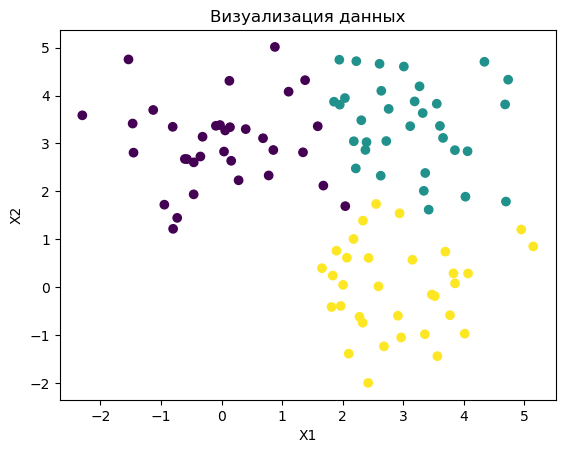

In [3]:
RANDOM_SEED=0
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

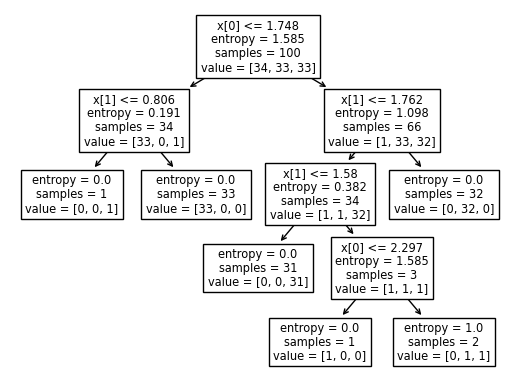

In [5]:
plot_tree(clf_tree) 
plt.show()

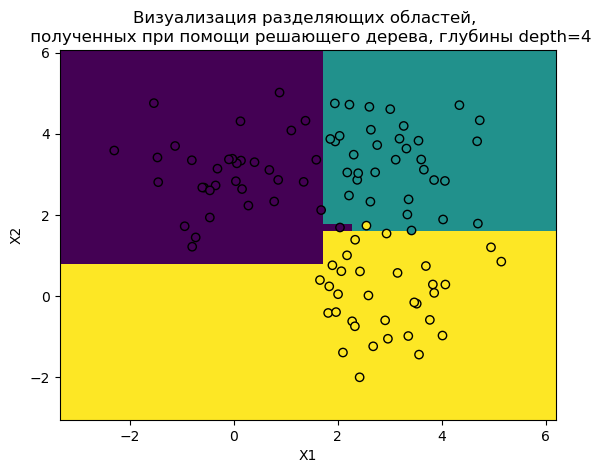

In [6]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [8]:
observation_new = [[2, 1]]

In [9]:
clf_tree.predict(observation_new)

array([2])

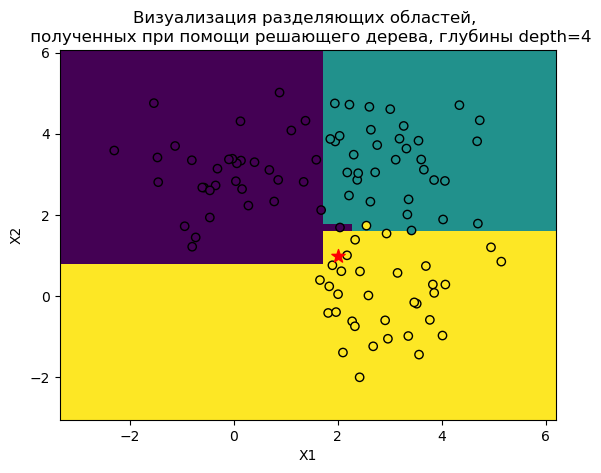

In [11]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

prediction = clf_tree.predict(observation_new)
plt.scatter(observation_new[0][0], observation_new[0][1], 
            c='red', marker='*', s=100)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [12]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

In [14]:
from sklearn.tree import DecisionTreeRegressor
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3, random_state=0)

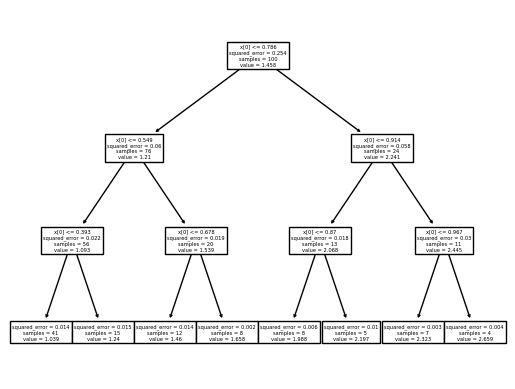

In [15]:
plot_tree(reg_tree) 
plt.show()

Text(0, 0.5, 'y')

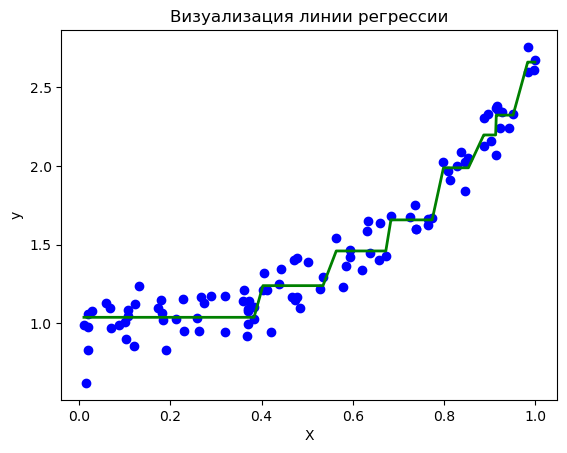

In [17]:
plt.scatter(X, y, c="b")
y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9553567494853966
MSE=  0.01131764995260428


In [19]:
observation_new = [[0.7]]

Text(0, 0.5, 'y')

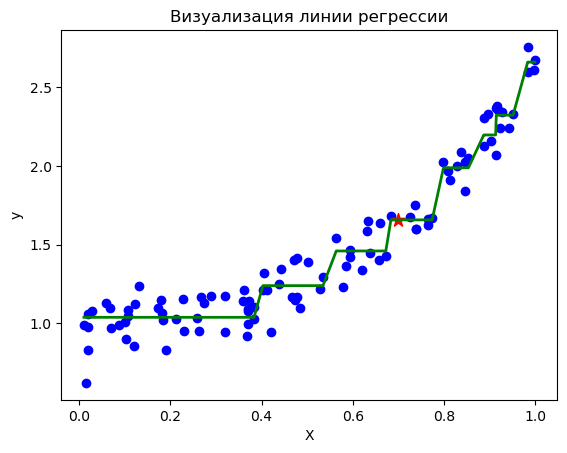

In [21]:
plt.scatter(X, y, c="b")
y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)
plt.scatter(observation_new[0][0], reg_tree.predict(observation_new), 
            c='red', marker='*', s=100)
plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')